分析页面：https://wp.m.163.com/163/page/news/virus_report/index.html?_nw_=1&anw_=1

### 1.1API寻找
   - 在header里找到想要的地址。API关键作用：通过API直接拿取想要的数据。
  
 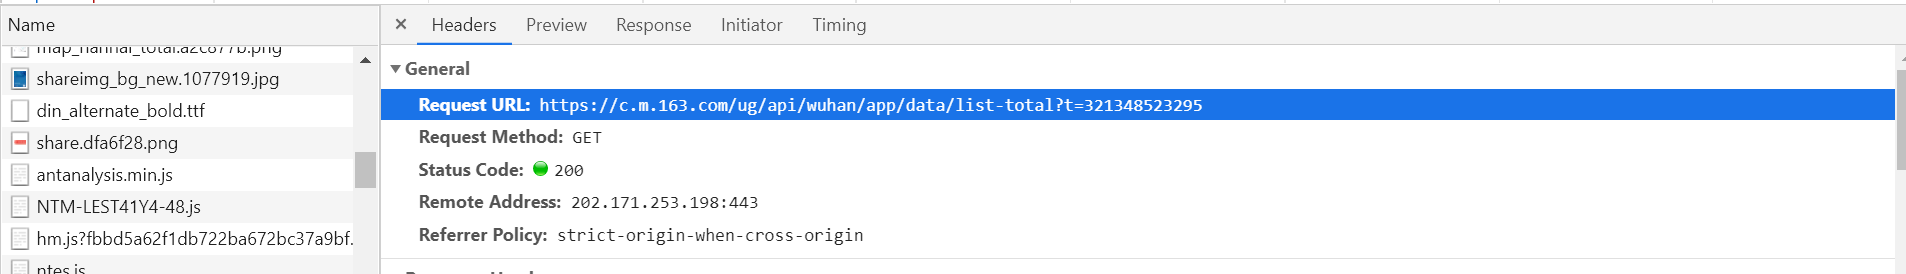

In [1]:
import pandas as pd
import requests
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36\
    (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36'
}

### 1.2 代理
   - 拿数据需要伪装浏览器注意反爬机制 
   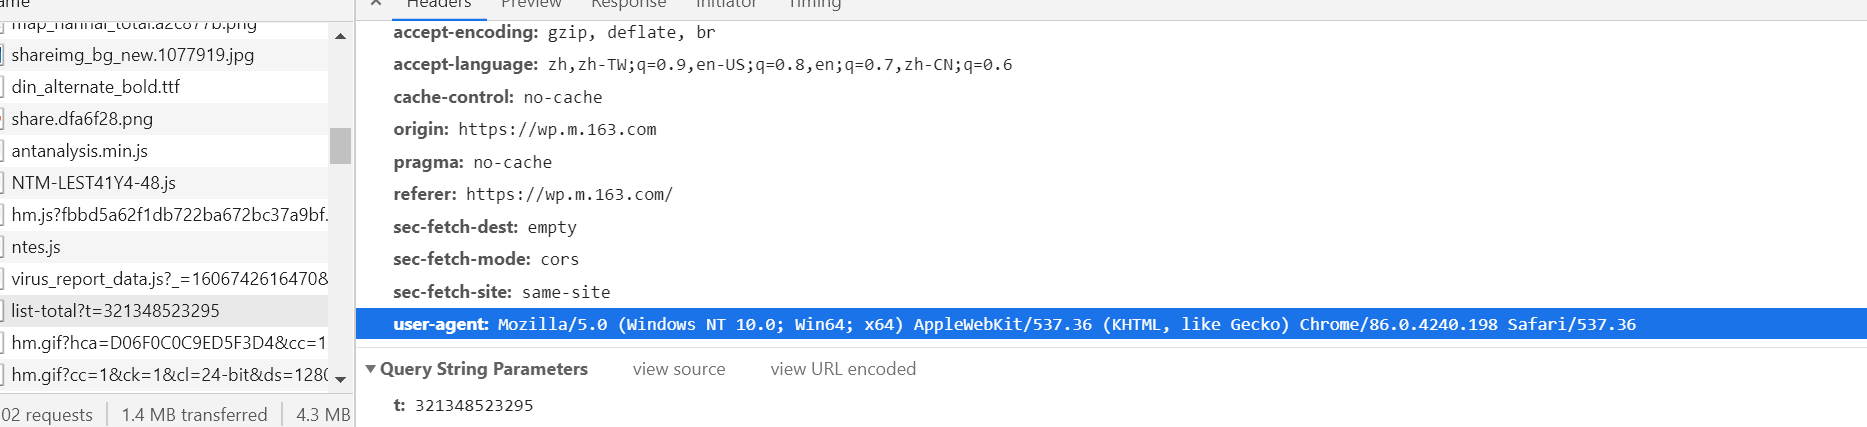

In [2]:
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36\
    (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36'
}

- 首先进行页面解析（API）
https://c.m.163.com/ug/api/wuhan/app/data/list-total?t=321348523295 \
一般来说，后面的时间戳进行省略，简化API
https://c.m.163.com/ug/api/wuhan/app/data/list-total?/ \
接下来进行解析

In [3]:
url = 'https://c.m.163.com/ug/api/wuhan/app/data/list-total?'
res = requests.get(url,headers=headers)
res.text

'{"reqId":16082124430382013,"code":10000,"msg":"成功","data":{"chinaTotal":{"today":{"confirm":104,"suspect":null,"heal":214,"dead":1,"severe":null,"storeConfirm":-15,"input":7},"total":{"confirm":95479,"suspect":0,"heal":89037,"dead":4765,"severe":0,"input":4068},"extData":{"noSymptom":198,"incrNoSymptom":6}},"chinaDayList":[{"date":"2020-01-13","today":{"confirm":0,"suspect":0,"heal":0,"dead":0,"severe":null,"storeConfirm":0,"input":0},"total":{"confirm":41,"suspect":0,"heal":0,"dead":1,"severe":null,"input":0,"storeConfirm":0},"extData":null,"lastUpdateTime":null},{"date":"2020-01-14","today":{"confirm":0,"suspect":0,"heal":0,"dead":0,"severe":null,"storeConfirm":0,"input":0},"total":{"confirm":41,"suspect":0,"heal":0,"dead":1,"severe":null,"input":0,"storeConfirm":0},"extData":null,"lastUpdateTime":null},{"date":"2020-01-15","today":{"confirm":0,"suspect":0,"heal":0,"dead":0,"severe":null,"storeConfirm":0,"input":0},"total":{"confirm":41,"suspect":0,"heal":5,"dead":2,"severe":null,"i

In [4]:
#数据混乱，分析类型
print(type(res.text))
print(len(res.text))

<class 'str'>
370160


- json包主要针对字符串进行解析，因此调用json对数据解析
    - json格式一般为为字典格式，主要有key和value两个属性

In [5]:
import json
data_json = json.loads(res.text)
data_json

{'reqId': 16082124430382013,
 'code': 10000,
 'msg': '成功',
 'data': {'chinaTotal': {'today': {'confirm': 104,
    'suspect': None,
    'heal': 214,
    'dead': 1,
    'severe': None,
    'storeConfirm': -15,
    'input': 7},
   'total': {'confirm': 95479,
    'suspect': 0,
    'heal': 89037,
    'dead': 4765,
    'severe': 0,
    'input': 4068},
   'extData': {'noSymptom': 198, 'incrNoSymptom': 6}},
  'chinaDayList': [{'date': '2020-01-13',
    'today': {'confirm': 0,
     'suspect': 0,
     'heal': 0,
     'dead': 0,
     'severe': None,
     'storeConfirm': 0,
     'input': 0},
    'total': {'confirm': 41,
     'suspect': 0,
     'heal': 0,
     'dead': 1,
     'severe': None,
     'input': 0,
     'storeConfirm': 0},
    'extData': None,
    'lastUpdateTime': None},
   {'date': '2020-01-14',
    'today': {'confirm': 0,
     'suspect': 0,
     'heal': 0,
     'dead': 0,
     'severe': None,
     'storeConfirm': 0,
     'input': 0},
    'total': {'confirm': 41,
     'suspect': 0,
    

In [6]:
data = data_json['data']
data.keys()

dict_keys(['chinaTotal', 'chinaDayList', 'lastUpdateTime', 'overseaLastUpdateTime', 'areaTree'])

- chinaTotal:中国当日数据
- chinaDayList：中国历史数据
- lastUpdateTime：最后的更新时间
- overseaLastupdateTime：海外的最后更新时间
- areaTree：世界各地实时数据

In [7]:
data_province = data['areaTree'][2]['children']
data_province

[{'today': {'confirm': 0,
   'suspect': None,
   'heal': 0,
   'dead': 0,
   'severe': None,
   'storeConfirm': 0},
  'total': {'confirm': 68149,
   'suspect': 0,
   'heal': 63637,
   'dead': 4512,
   'severe': 0,
   'input': 0},
  'extData': {},
  'name': '湖北',
  'id': '420000',
  'lastUpdateTime': '2020-12-17 08:31:27',
  'children': [{'today': {'confirm': 0,
     'suspect': None,
     'heal': None,
     'dead': None,
     'severe': None,
     'storeConfirm': None},
    'total': {'confirm': 50340,
     'suspect': 0,
     'heal': 46471,
     'dead': 3869,
     'severe': 0},
    'extData': {},
    'name': '武汉',
    'id': '420100',
    'lastUpdateTime': '2020-12-17 00:01:15',
    'children': []},
   {'today': {'confirm': 0,
     'suspect': None,
     'heal': None,
     'dead': None,
     'severe': None,
     'storeConfirm': None},
    'total': {'confirm': 3518,
     'suspect': 0,
     'heal': 3389,
     'dead': 129,
     'severe': 0},
    'extData': {},
    'name': '孝感',
    'id': '4209

已经拿到了各个省的数据，现在分析这个数据的一些键值对就需要一个索引列表的过程，不能直接.keys()

In [8]:
data_province[0].keys()

dict_keys(['today', 'total', 'extData', 'name', 'id', 'lastUpdateTime', 'children'])

today:各省当日数据\
total:各省当日累计数据\
extData:无任何数据\
name:各省名称\
id:各省行政编码\
lastUpdateTime:更新的时间\
children:各省下一级的数据

In [9]:
pd.DataFrame(data_province).head()

,today,total,extData,name,id,lastUpdateTime,children
0,"{'confirm': 0, 'suspect': None, 'heal': 0, 'de...","{'confirm': 68149, 'suspect': 0, 'heal': 63637...",{},湖北,420000,2020-12-17 08:31:27,"[{'today': {'confirm': 0, 'suspect': None, 'he..."
1,"{'confirm': 82, 'suspect': None, 'heal': 189, ...","{'confirm': 7899, 'suspect': 0, 'heal': 6534, ...",{},香港,810000,2020-12-17 19:56:42,"[{'today': {'confirm': 82, 'suspect': None, 'h..."
2,"{'confirm': 1, 'suspect': None, 'heal': 0, 'de...","{'confirm': 2022, 'suspect': 0, 'heal': 1973, ...",{},广东,440000,2020-12-17 08:31:27,"[{'today': {'confirm': 1, 'suspect': None, 'he..."
3,"{'confirm': 6, 'suspect': None, 'heal': 6, 'de...","{'confirm': 1424, 'suspect': 0, 'heal': 1329, ...",{},上海,310000,2020-12-17 08:31:26,"[{'today': {'confirm': 6, 'suspect': None, 'he..."
4,"{'confirm': 0, 'suspect': None, 'heal': 0, 'de...","{'confirm': 1297, 'suspect': 0, 'heal': 1290, ...",{},浙江,330000,2020-12-17 00:01:15,"[{'today': {'confirm': 0, 'suspect': None, 'he..."


- 问题：
    - 1.extData全是空值直接删除
    - 2.today和total里面又封装了几层

In [10]:
free_data = pd.DataFrame(data_province)[['id','lastUpdateTime','name']]
today_data = pd.DataFrame([province['today'] for province in data_province])
today_data.head()

,confirm,suspect,heal,dead,severe,storeConfirm
0,0,None,0,0,None,0
1,82,None,189,1,None,-12
2,1,None,0,0,None,1
3,6,None,6,0,None,0
4,0,None,0,0,None,0


In [11]:
total_data = pd.DataFrame([province['total'] for province in data_province])
total_data.head()

,confirm,suspect,heal,dead,severe,input,newConfirm,newDead,newHeal
0,68149,0,63637,4512,0,0,NaN,NaN,NaN
1,7899,0,6534,124,0,0,NaN,NaN,NaN
2,2022,0,1973,8,0,0,NaN,NaN,NaN
3,1424,0,1329,7,0,0,NaN,NaN,NaN
4,1297,0,1290,1,0,0,NaN,NaN,NaN


In [12]:
# today和total里面的列名一样，进行更改
today_data.columns=("today_"+i for i in today_data.columns)
total_data.columns=("total_"+i for i in total_data.columns)
#将清洗好的数据进行整合（用函数concat）
China_data = pd.concat([free_data,today_data,total_data],axis=1)
China_data

,id,lastUpdateTime,name,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,total_confirm,total_suspect,total_heal,total_dead,total_severe,total_input,total_newConfirm,total_newDead,total_newHeal
0,420000,2020-12-17 08:31:27,湖北,0,None,0,0,None,0,68149,0,63637,4512,0,0,NaN,NaN,NaN
1,810000,2020-12-17 19:56:42,香港,82,None,189,1,None,-12,7899,0,6534,124,0,0,NaN,NaN,NaN
2,440000,2020-12-17 08:31:27,广东,1,None,0,0,None,1,2022,0,1973,8,0,0,NaN,NaN,NaN
3,310000,2020-12-17 08:31:26,上海,6,None,6,0,None,0,1424,0,1329,7,0,0,NaN,NaN,NaN
4,330000,2020-12-17 00:01:15,浙江,0,None,0,0,None,0,1297,0,1290,1,0,0,NaN,NaN,NaN
5,410000,2020-12-17 09:46:26,河南,0,None,1,0,None,-1,1295,0,1267,22,0,0,NaN,NaN,NaN
6,430000,2020-12-17 00:01:15,湖南,0,None,0,0,None,0,1020,0,1016,4,0,0,NaN,NaN,NaN
7,340000,2020-12-17 00:01:15,安徽,0,None,0,0,None,0,992,0,986,6,0,0,NaN,NaN,NaN
8,650000,2020-12-17 00:01:15,新疆,0,None,0,0,None,0,980,0,977,3,0,0,NaN,NaN,NaN
9,230000,2020-12-17 00:01:14,黑龙江,0,None,0,0,None,0,960,0,936,13,0,0,NaN,NaN,NaN


In [13]:
# 接下来对数据进行保存
import time
file_name = '今天中国各省'+'_'+time.strftime('%Y_%m_%d',time.localtime(time.time()))+'.csv'
China_data.to_csv(file_name,index=None,encoding='utf_8_sig')
print("中国各省疫情数据保存成功！")

中国各省疫情数据保存成功！


## 中国当天更新疫情数据爬取 总代码

In [14]:
import pandas as pd
import requests
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36\
    (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36'
}
url = 'https://c.m.163.com/ug/api/wuhan/app/data/list-total?'
res = requests.get(url,headers=headers)

import json
data_json = json.loads(res.text)
data = data_json['data']
data_province = data['areaTree'][2]['children']
free_data = pd.DataFrame(data_province)[['id','lastUpdateTime','name']]
today_data = pd.DataFrame([province['today'] for province in data_province])
total_data = pd.DataFrame([province['total'] for province in data_province])
today_data.columns=("today_"+i for i in today_data.columns)
total_data.columns=("total_"+i for i in total_data.columns)
China_data = pd.concat([free_data,today_data,total_data],axis=1)

import time
file_name = '今天中国各省'+'_'+time.strftime('%Y_%m_%d',time.localtime(time.time()))+'.csv'
China_data.to_csv(file_name,index=None,encoding='utf_8_sig')
print("中国各省疫情数据保存成功！")

中国各省疫情数据保存成功！


### 爬取全球实时数据

In [15]:
import pandas as pd
import requests
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36\
    (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36'
}
url = 'https://c.m.163.com/ug/api/wuhan/app/data/list-total?'
res = requests.get(url,headers=headers)

import json
data_json = json.loads(res.text)
data = data_json['data']

In [16]:
areaTree = data['areaTree']
areaTree

[{'today': {'confirm': 1306,
   'suspect': None,
   'heal': 1083,
   'dead': 41,
   'severe': None,
   'storeConfirm': None},
  'total': {'confirm': 114547,
   'suspect': 0,
   'heal': 87884,
   'dead': 3997,
   'severe': 0,
   'input': 0},
  'extData': {},
  'name': '突尼斯',
  'id': '9577772',
  'lastUpdateTime': '2020-12-17 08:31:21',
  'children': []},
 {'today': {'confirm': 5353,
   'suspect': None,
   'heal': 0,
   'dead': 0,
   'severe': None,
   'storeConfirm': None},
  'total': {'confirm': 282601,
   'suspect': 0,
   'heal': 15913,
   'dead': 2482,
   'severe': 0,
   'input': 0},
  'extData': {},
  'name': '塞尔维亚',
  'id': '9507896',
  'lastUpdateTime': '2020-12-17 00:01:13',
  'children': []},
 {'today': {'confirm': 104,
   'suspect': None,
   'heal': 214,
   'dead': 1,
   'severe': None,
   'storeConfirm': -15,
   'input': 7},
  'total': {'confirm': 95479,
   'suspect': 0,
   'heal': 89037,
   'dead': 4765,
   'severe': 0,
   'input': 4068},
  'extData': {'noSymptom': 198, 'incr

In [17]:
areaTree[0].keys()

dict_keys(['today', 'total', 'extData', 'name', 'id', 'lastUpdateTime', 'children'])

today:当日数据\
total:累计数据\
extData:无任何数据\
name:国家名称\
id:国家编号\
lastUpdateTime:更新时间\
children:各国下一级数据（例如省份或州）

In [18]:
free_data = pd.DataFrame(areaTree)[['id','lastUpdateTime','name']]
today_data = pd.DataFrame([province['today'] for province in areaTree])
total_data = pd.DataFrame([province['total'] for province in areaTree])
today_data.columns=("today_"+i for i in today_data.columns)
total_data.columns=("total_"+i for i in total_data.columns)
country_data = pd.concat([free_data,today_data,total_data],axis=1)
country_data

,id,lastUpdateTime,name,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,today_input,total_confirm,total_suspect,total_heal,total_dead,total_severe,total_input
0,9577772,2020-12-17 08:31:21,突尼斯,1306.0,NaN,1083.0,41.0,NaN,NaN,NaN,114547,0,87884,3997,0,0.0
1,9507896,2020-12-17 00:01:13,塞尔维亚,5353.0,NaN,0.0,0.0,NaN,NaN,NaN,282601,0,15913,2482,0,0.0
2,0,2020-12-17 20:16:39,中国,104.0,NaN,214.0,1.0,NaN,-15.0,7.0,95479,0,89037,4765,0,4068.0
3,1,2020-12-17 21:06:38,日本本土,3209.0,NaN,2723.0,31.0,NaN,NaN,NaN,190913,0,158114,2654,0,0.0
4,2,2020-12-17 13:56:34,泰国,20.0,NaN,12.0,0.0,NaN,NaN,NaN,4281,0,3989,60,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,82333,2020-06-15 13:26:03,格恩西岛,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252,0,238,13,0,NaN
203,95677,2020-12-17 21:06:38,罗马尼亚,5697.0,NaN,7640.0,107.0,NaN,NaN,NaN,577446,0,477139,13969,0,0.0
204,95436,2020-12-17 18:51:43,阿曼,184.0,NaN,273.0,3.0,NaN,NaN,NaN,127019,0,119009,1483,0,0.0
205,95672,2020-06-15 14:25:46,列支敦士登,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,0,55,1,0,NaN


In [19]:
import time
def save_data(data,name):
    file_name = name+'_'+time.strftime('%Y_%m_%d',time.localtime(time.time()))+'.csv'
    data.to_csv(file_name,index=None,encoding='utf_8_sig')
    print(file_name+'保存成功！')
save_data(country_data,'country_data')

country_data_2020_12_17.csv保存成功！


### 中国历史数据爬取

In [20]:
chinaDayList = data['chinaDayList']
chinaDayList[0].keys()

dict_keys(['date', 'today', 'total', 'extData', 'lastUpdateTime'])

In [21]:
free_data = pd.DataFrame(chinaDayList)[['date','lastUpdateTime']]
today_data = pd.DataFrame([province['today'] for province in chinaDayList])
total_data = pd.DataFrame([province['total'] for province in chinaDayList])
today_data.columns=("today_"+i for i in today_data.columns)
total_data.columns=("total_"+i for i in total_data.columns)
chinaDayList_data = pd.concat([free_data,today_data,total_data],axis=1)
chinaDayList_data

,date,lastUpdateTime,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,today_input,total_confirm,total_suspect,total_heal,total_dead,total_severe,total_input,total_storeConfirm
0,2020-01-13,None,0,0,0,0,None,0,0,41,0,0,1,None,0,0
1,2020-01-14,None,0,0,0,0,None,0,0,41,0,0,1,None,0,0
2,2020-01-15,None,0,0,0,0,None,0,0,41,0,5,2,None,0,0
3,2020-01-16,None,0,0,0,0,None,0,0,45,0,8,2,None,0,0
4,2020-01-17,None,0,0,0,0,None,0,0,62,0,12,2,None,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,2020-12-12,None,101,1,0,0,None,0,19,94950,0,88546,4756,None,4021,1648
335,2020-12-13,None,114,0,0,0,None,0,14,95064,0,88648,4758,None,4035,1658
336,2020-12-14,None,103,0,0,0,None,0,14,95167,0,88730,4761,None,4049,1676
337,2020-12-15,None,112,1,0,0,None,0,12,95279,0,88823,4764,None,4061,1692


In [22]:
chinaDayList_data.keys()

Index(['date', 'lastUpdateTime', 'today_confirm', 'today_suspect',
       'today_heal', 'today_dead', 'today_severe', 'today_storeConfirm',
       'today_input', 'total_confirm', 'total_suspect', 'total_heal',
       'total_dead', 'total_severe', 'total_input', 'total_storeConfirm'],
      dtype='object')

In [23]:
import time
def save_data(data,name):
    file_name = name+'_'+time.strftime('%Y_%m_%d',time.localtime(time.time()))+'.csv'
    data.to_csv(file_name,index=None,encoding='utf_8_sig')
    print(file_name+'保存成功！')
save_data(chinaDayList_data,'chinaDayList_data')

chinaDayList_data_2020_12_17.csv保存成功！


## 5.数据初探和数据预处理

  - 本次目标：论证一下是否有的地方确诊病例很多但死亡率很低

In [24]:
import pandas as pd
country_data = pd.read_csv("./country_data_2020_12_17.csv")
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症',
             'total_input':'累计输入','today_input':'当日新增输入'}
country_data.rename(columns=name_dict,inplace=True)
country_data

,编号,更新时间,名称,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日新增输入,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计输入
0,9577772,2020-12-17 08:31:21,突尼斯,1306.0,NaN,1083.0,41.0,NaN,NaN,NaN,114547,0,87884,3997,0,0.0
1,9507896,2020-12-17 00:01:13,塞尔维亚,5353.0,NaN,0.0,0.0,NaN,NaN,NaN,282601,0,15913,2482,0,0.0
2,0,2020-12-17 20:16:39,中国,104.0,NaN,214.0,1.0,NaN,-15.0,7.0,95479,0,89037,4765,0,4068.0
3,1,2020-12-17 21:06:38,日本本土,3209.0,NaN,2723.0,31.0,NaN,NaN,NaN,190913,0,158114,2654,0,0.0
4,2,2020-12-17 13:56:34,泰国,20.0,NaN,12.0,0.0,NaN,NaN,NaN,4281,0,3989,60,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,82333,2020-06-15 13:26:03,格恩西岛,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252,0,238,13,0,NaN
203,95677,2020-12-17 21:06:38,罗马尼亚,5697.0,NaN,7640.0,107.0,NaN,NaN,NaN,577446,0,477139,13969,0,0.0
204,95436,2020-12-17 18:51:43,阿曼,184.0,NaN,273.0,3.0,NaN,NaN,NaN,127019,0,119009,1483,0,0.0
205,95672,2020-06-15 14:25:46,列支敦士登,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,0,55,1,0,NaN


- 首先进行数据基本信息和特征的统计信息
    - info()
    - info函数主要针对缺失值的统计，本数据中有较多缺失值，因此进行分析。
    - describe()
    - 

In [25]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   编号      207 non-null    object 
 1   更新时间    207 non-null    object 
 2   名称      207 non-null    object 
 3   当日新增确诊  160 non-null    float64
 4   当日新增疑似  13 non-null     float64
 5   当日新增治愈  160 non-null    float64
 6   当日新增死亡  160 non-null    float64
 7   当日新增重症  13 non-null     float64
 8   当日现存确诊  1 non-null      float64
 9   当日新增输入  6 non-null      float64
 10  累计确诊    207 non-null    int64  
 11  累计疑似    207 non-null    int64  
 12  累计治愈    207 non-null    int64  
 13  累计死亡    207 non-null    int64  
 14  累计重症    207 non-null    int64  
 15  累计输入    170 non-null    float64
dtypes: float64(8), int64(5), object(3)
memory usage: 26.0+ KB


In [26]:
country_data.describe()

,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日新增输入,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计输入
count,160.000000,13.0,160.000000,160.000000,13.0,1.0,6.000000,2.070000e+02,207.0,2.070000e+02,207.000000,207.0,170.000000
mean,4492.131250,0.0,3147.350000,78.331250,0.0,-15.0,1.166667,3.604956e+05,0.0,2.524250e+05,7998.521739,0.0,23.929412
std,20785.632723,0.0,14068.807359,309.286798,0.0,NaN,2.857738,1.512127e+06,0.0,1.080711e+06,29833.695187,0.0,312.001357
min,0.000000,0.0,0.000000,0.000000,0.0,-15.0,0.000000,1.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.000000
25%,42.000000,0.0,0.000000,0.000000,0.0,-15.0,0.000000,5.945000e+02,0.0,3.080000e+02,15.000000,0.0,0.000000
50%,397.500000,0.0,53.000000,3.000000,0.0,-15.0,0.000000,1.758700e+04,0.0,1.272700e+04,259.000000,0.0,0.000000
75%,2091.250000,0.0,1296.250000,25.250000,0.0,-15.0,0.000000,1.533275e+05,0.0,1.091980e+05,2640.500000,0.0,0.000000
max,246996.000000,0.0,162882.000000,3509.000000,0.0,-15.0,7.000000,1.739262e+07,0.0,1.017074e+07,314577.000000,0.0,4068.000000


### 数据预处理
- apply():
    - DataFrame.apply(func , axis=0 , broadcast=False , raw=False , reduce=None , args=() , ** kwds)
- lambda():
    - lambda变量:要执行的语句
    - 匿名函数常用于修改一列Series的修改
    - format函数:格式化输出字符串
- 一般来说小于原始数据的一半就可以直接删除处理，但是其实对于疫情数据而言，有缺失值很正常,因为有的地区已经清0.


In [27]:
missing = country_data.isnull().sum()
missing

编号          0
更新时间        0
名称          0
当日新增确诊     47
当日新增疑似    194
当日新增治愈     47
当日新增死亡     47
当日新增重症    194
当日现存确诊    206
当日新增输入    201
累计确诊        0
累计疑似        0
累计治愈        0
累计死亡        0
累计重症        0
累计输入       37
dtype: int64

In [28]:
##数据预处理
## apply() lambda()
(missing/len(country_data)).apply(lambda x : format(x,'.1%'))

编号         0.0%
更新时间       0.0%
名称         0.0%
当日新增确诊    22.7%
当日新增疑似    93.7%
当日新增治愈    22.7%
当日新增死亡    22.7%
当日新增重症    93.7%
当日现存确诊    99.5%
当日新增输入    97.1%
累计确诊       0.0%
累计疑似       0.0%
累计治愈       0.0%
累计死亡       0.0%
累计重症       0.0%
累计输入      17.9%
dtype: object

- 从数据中可以发现：
    - 当日现存病例=累计确诊-累计治愈-累计死亡
    - 死亡率=累计死亡/累计确诊

In [29]:
country_data['当日现存病例']=country_data['累计确诊']-country_data['累计治愈']-country_data['累计死亡']
country_data['死亡率']=((country_data['累计死亡']/country_data['累计确诊']).apply(lambda x : format(x,'.3f'))).astype('float')
country_data.sort_values('死亡率',ascending=False,inplace=True)
country_data.head(10)

,编号,更新时间,名称,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日新增输入,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计输入,当日现存病例,死亡率
168,95200,2020-12-17 00:01:13,也门,1.0,NaN,0.0,0.0,NaN,NaN,NaN,2085,0,1384,606,0,0.0,95,0.291
144,95287,2020-06-15 14:48:56,圣马丁岛,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,0,61,15,0,NaN,1,0.195
16,828,2020-06-09 19:59:04,毛利亚尼亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,0,6,2,0,NaN,8,0.125
197,96745,2020-12-17 11:01:23,墨西哥,10297.0,NaN,7584.0,670.0,NaN,NaN,NaN,1277499,0,945673,115769,0,0.0,216057,0.091
33,80902,2020-06-12 17:02:32,蒙特塞拉特,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0,10,1,0,NaN,0,0.091
28,875097,2020-06-12 17:06:26,美属维尔京群岛,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,0,46,6,0,NaN,20,0.083
151,89665,2020-06-15 13:49:44,瓜德罗普,NaN,0.0,NaN,NaN,0.0,NaN,NaN,171,0,157,14,0,NaN,0,0.082
125,95303,2020-06-15 13:51:31,圭亚那,NaN,0.0,NaN,NaN,0.0,NaN,NaN,159,0,99,12,0,NaN,48,0.075
99,8151,2020-06-15 13:01:51,巴巴多斯,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,0,83,7,0,NaN,6,0.073
61,95102,2020-12-17 08:31:21,厄瓜多尔,1105.0,NaN,0.0,19.0,NaN,NaN,NaN,203461,0,177951,13915,0,0.0,11595,0.068


- sort_values():用于数据排序
- astype():进行数据的强制转换

上述数据看起来比较多，也比较冗余，将不需要进行探索的数据进行删除

In [30]:
# 删除数据
country_data.drop(columns=['编号','当日新增疑似','当日新增治愈','当日新增重症','当日新增输入','累计输入','累计重症'],inplace=True)

In [31]:
#重置索引
country_data.set_index('名称',inplace=True)
country_data

,更新时间,当日新增确诊,当日新增死亡,当日现存确诊,累计确诊,累计疑似,累计治愈,累计死亡,当日现存病例,死亡率
名称,,,,,,,,,,
也门,2020-12-17 00:01:13,1.0,0.0,NaN,2085,0,1384,606,95,0.291
圣马丁岛,2020-06-15 14:48:56,NaN,NaN,NaN,77,0,61,15,1,0.195
毛利亚尼亚,2020-06-09 19:59:04,NaN,NaN,NaN,16,0,6,2,8,0.125
墨西哥,2020-12-17 11:01:23,10297.0,670.0,NaN,1277499,0,945673,115769,216057,0.091
蒙特塞拉特,2020-06-12 17:02:32,NaN,NaN,NaN,11,0,10,1,0,0.091
...,...,...,...,...,...,...,...,...,...,...
格陵兰,2020-06-15 00:00:31,NaN,NaN,NaN,13,0,13,0,0,0.000
法罗群岛,2020-06-15 13:46:38,NaN,NaN,NaN,187,0,187,0,0,0.000
老挝,2020-06-15 14:24:59,NaN,NaN,NaN,19,0,19,0,0,0.000


In [32]:
##查看目前确诊排名前10的国家
world_top10 = country_data.sort_values(['累计确诊'],ascending=False).head(10)
world_top10 = world_top10[['累计确诊','累计死亡','死亡率']]##[[]]将series转换为dataframe
world_top10.head(10)

,累计确诊,累计死亡,死亡率
名称,,,
美国,17392618,314577,0.018
印度,9956557,144451,0.015
巴西,7040608,183735,0.026
俄罗斯,2736727,48568,0.018
法国,2465246,59472,0.024
土耳其,1928165,17121,0.009
英国,1918768,65618,0.034
意大利,1888144,66537,0.035
西班牙,1782566,48596,0.027


## 数据可视化

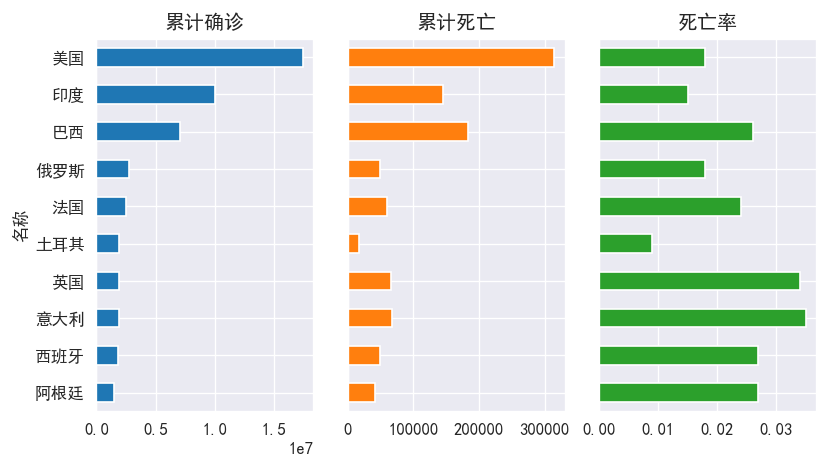

In [33]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')

#darkgrid:灰色网格 whitegrid:白色网格 dark:黑色 white:白色 ticks:十字叉
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.dpi']=120

world_top10.sort_values('累计确诊').plot.barh(subplots=True,layout=(1,3),sharex=False,
                                                figsize=(7,4),legend=False,sharey=True)

plt.tight_layout()
plt.show()

## 中国疫情数据分析

In [34]:
import pandas as pd
china_data = pd.read_csv("./chinaDayList_data_2020_12_17.csv")
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症',
             'total_input':'累计输入','today_input':'当日新增输入','total_storeConfirm':'累计现存确诊'}
china_data.rename(columns=name_dict,inplace=True)
china_data

,日期,更新时间,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日新增输入,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计输入,累计现存确诊
0,2020-01-13,NaN,0,0,0,0,NaN,0,0,41,0,0,1,NaN,0,0
1,2020-01-14,NaN,0,0,0,0,NaN,0,0,41,0,0,1,NaN,0,0
2,2020-01-15,NaN,0,0,0,0,NaN,0,0,41,0,5,2,NaN,0,0
3,2020-01-16,NaN,0,0,0,0,NaN,0,0,45,0,8,2,NaN,0,0
4,2020-01-17,NaN,0,0,0,0,NaN,0,0,62,0,12,2,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,2020-12-12,NaN,101,1,0,0,NaN,0,19,94950,0,88546,4756,NaN,4021,1648
335,2020-12-13,NaN,114,0,0,0,NaN,0,14,95064,0,88648,4758,NaN,4035,1658
336,2020-12-14,NaN,103,0,0,0,NaN,0,14,95167,0,88730,4761,NaN,4049,1676
337,2020-12-15,NaN,112,1,0,0,NaN,0,12,95279,0,88823,4764,NaN,4061,1692


In [35]:
china_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      339 non-null    object 
 1   更新时间    0 non-null      float64
 2   当日新增确诊  339 non-null    int64  
 3   当日新增疑似  339 non-null    int64  
 4   当日新增治愈  339 non-null    int64  
 5   当日新增死亡  339 non-null    int64  
 6   当日新增重症  0 non-null      float64
 7   当日现存确诊  339 non-null    int64  
 8   当日新增输入  339 non-null    int64  
 9   累计确诊    339 non-null    int64  
 10  累计疑似    339 non-null    int64  
 11  累计治愈    339 non-null    int64  
 12  累计死亡    339 non-null    int64  
 13  累计重症    0 non-null      float64
 14  累计输入    339 non-null    int64  
 15  累计现存确诊  339 non-null    int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 42.5+ KB


In [36]:
china_data.describe()

,更新时间,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日新增输入,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计输入,累计现存确诊
count,0.0,339.000000,339.000000,339.0,339.0,0.0,339.0,339.000000,339.000000,339.0,339.000000,339.000000,0.0,339.000000,339.000000
mean,NaN,283.554572,290.209440,0.0,0.0,NaN,0.0,11.946903,80266.250737,0.0,70784.483776,3974.336283,NaN,1892.058997,5502.749263
std,NaN,1053.673096,973.825118,0.0,0.0,NaN,0.0,14.514331,22097.434319,0.0,26582.209355,1361.374094,NaN,1223.045451,12638.766504
min,NaN,0.000000,0.000000,0.0,0.0,NaN,0.0,0.000000,41.000000,0.0,0.000000,1.000000,NaN,0.000000,0.000000
25%,NaN,19.000000,0.000000,0.0,0.0,NaN,0.0,2.000000,83114.000000,0.0,77518.000000,3341.000000,NaN,1012.500000,419.500000
50%,NaN,36.000000,1.000000,0.0,0.0,NaN,0.0,8.000000,85232.000000,0.0,80068.000000,4648.000000,NaN,1918.000000,675.000000
75%,NaN,110.000000,6.000000,0.0,0.0,NaN,0.0,15.500000,90913.000000,0.0,85773.500000,4744.500000,NaN,2761.500000,2109.500000
max,NaN,15153.000000,5328.000000,0.0,0.0,NaN,0.0,98.000000,95375.000000,0.0,88939.000000,4764.000000,NaN,4068.000000,58097.000000


In [37]:
missing = china_data.isnull().sum()
missing

日期          0
更新时间      339
当日新增确诊      0
当日新增疑似      0
当日新增治愈      0
当日新增死亡      0
当日新增重症    339
当日现存确诊      0
当日新增输入      0
累计确诊        0
累计疑似        0
累计治愈        0
累计死亡        0
累计重症      339
累计输入        0
累计现存确诊      0
dtype: int64

In [38]:
(missing/len(china_data)).apply(lambda x : format(x,'.1%'))

日期          0.0%
更新时间      100.0%
当日新增确诊      0.0%
当日新增疑似      0.0%
当日新增治愈      0.0%
当日新增死亡      0.0%
当日新增重症    100.0%
当日现存确诊      0.0%
当日新增输入      0.0%
累计确诊        0.0%
累计疑似        0.0%
累计治愈        0.0%
累计死亡        0.0%
累计重症      100.0%
累计输入        0.0%
累计现存确诊      0.0%
dtype: object

In [39]:
# 删除数据
china_data.drop(columns=['更新时间','当日新增疑似','当日新增治愈','当日新增重症','当日新增输入','累计重症','累计现存确诊'],inplace=True)

In [40]:
china_data.head(10)

,日期,当日新增确诊,当日新增死亡,当日现存确诊,累计确诊,累计疑似,累计治愈,累计死亡,累计输入
0,2020-01-13,0,0,0,41,0,0,1,0
1,2020-01-14,0,0,0,41,0,0,1,0
2,2020-01-15,0,0,0,41,0,5,2,0
3,2020-01-16,0,0,0,45,0,8,2,0
4,2020-01-17,0,0,0,62,0,12,2,0
5,2020-01-18,0,0,0,198,0,17,3,0
6,2020-01-19,0,0,0,275,0,18,4,0
7,2020-01-20,77,0,0,291,0,25,6,0
8,2020-01-21,149,0,0,440,0,25,9,0
9,2020-01-22,131,0,0,574,0,25,17,0


[8.75874571e+04 5.67136359e+02 1.83142067e-01]


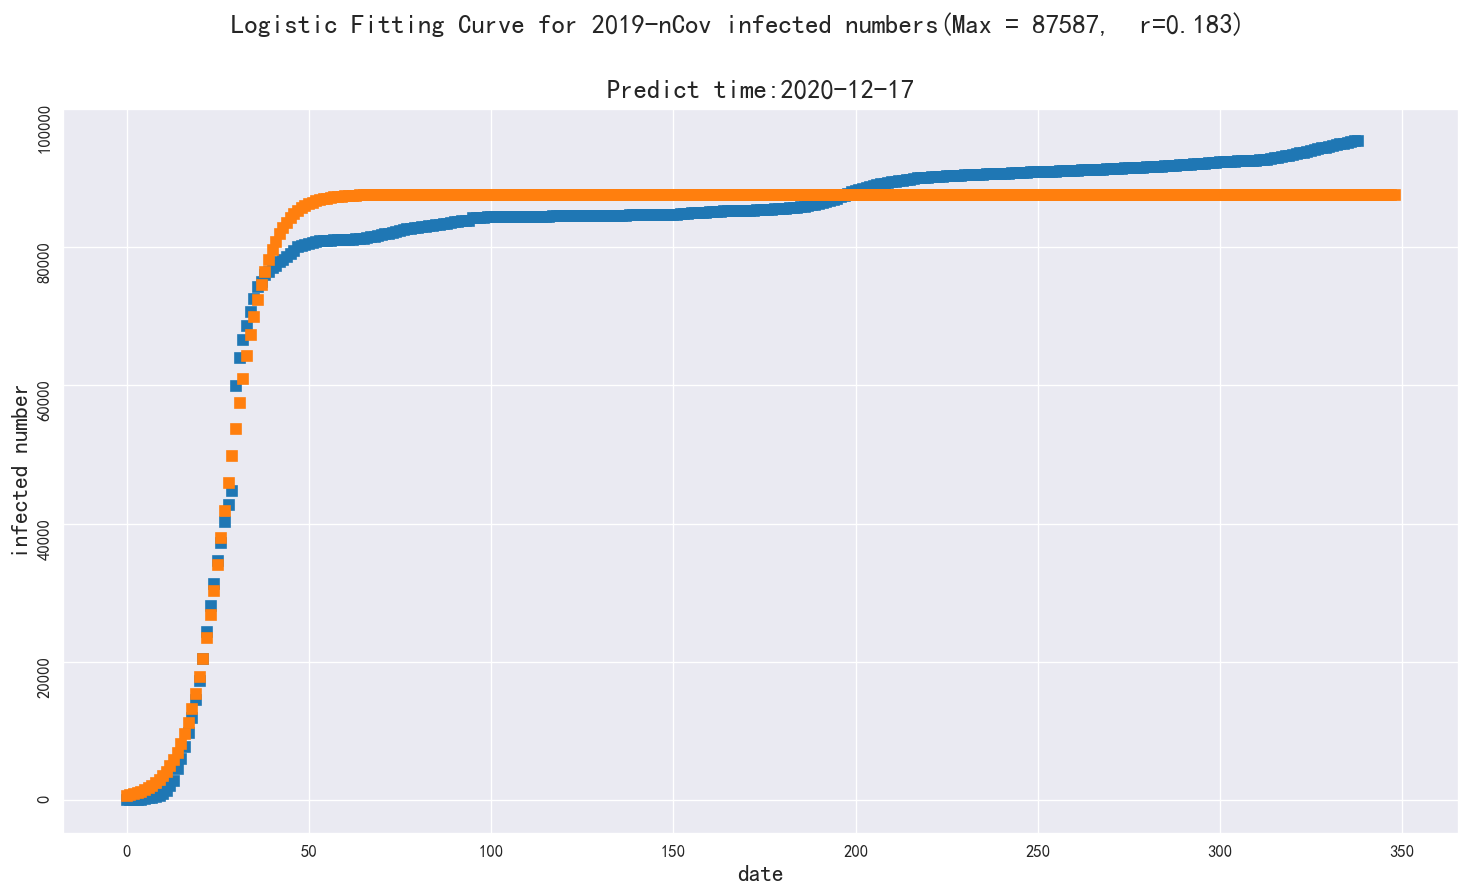

In [41]:
from scipy.optimize import curve_fit
import urllib
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

csv_file = "./chinaDayList_data_2020_12_17.csv"
 
def logistic_function(t, K, P0, r):
    t0 = 0
    exp = np.exp(r * (t - t0))
    return (K * exp * P0) / (K + (exp - 1) * P0)
 
def predict():
    predict_days = 10 # 预测未来天数
    
    df = pd.read_csv(csv_file, encoding="utf-8")
    confirm = df['total_confirm'].values
    x = np.arange(len(confirm))
 
    # 用最小二乘法估计拟合
    popt, pcov = curve_fit(logistic_function, x, confirm)
    print(popt)
 
    #近期情况预测
    predict_x = list(x) + [x[-1] + i for i in range(1, 1 + predict_days)]
    predict_x = np.array(predict_x)
    predict_y = logistic_function(predict_x, popt[0], popt[1], popt[2])
    
    #绘图
    plt.figure(figsize=(15, 8))
    plt.plot(x, confirm, 's',label="confimed infected number")
    plt.plot(predict_x, predict_y, 's',label="predicted infected number")
    #plt.xticks(predict_x,rotation=90)
    plt.yticks(rotation=90)
 
    plt.suptitle("Logistic Fitting Curve for 2019-nCov infected numbers(Max = {},  r={:.3})".format(int(popt[0]), popt[2]), fontsize=16, fontweight="bold")
    plt.title("Predict time:{}".format(time.strftime("%Y-%m-%d", time.localtime())), fontsize=16)
    plt.xlabel('date', fontsize=14)
    plt.ylabel('infected number', fontsize=14)
    plt.plot()
    plt.show()
    
predict()